In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [3]:
import pandas as pd
import os
a=pd.read_csv('../input/stanford-car-dataset-by-classes-folder/names.csv')
car_names=a['AM General Hummer SUV 2000'].tolist() #csv file values to list
print(car_names)
len(car_names)

['Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura Integra Type R 2001', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012', 'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007', 'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW Z4 Convertible 2012', 'Bentley Continental Supers

195

In [4]:
car_names.index('Ram C/V Cargo Van Minivan 2012')
car_names[172]
car_names = ['Ram C-V Cargo Van Minivan 2012' if  i == 'Ram C/V Cargo Van Minivan 2012' else i for i in car_names] #correcting a spelling mistake in car name
car_names[172]

'Ram C-V Cargo Van Minivan 2012'

In [5]:
#training dataset not balanced beacause different number of image in different categories.
#so some changes eeded for better prediction
DATADIR = '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train'
number_of_images_in_each_car_folder=[]
for i in car_names:
    number_of_images_in_each_car_folder.append(len(os.listdir(os.path.join(DATADIR,i))))
print(number_of_images_in_each_car_folder)    

[32, 43, 42, 41, 45, 39, 45, 41, 33, 38, 37, 41, 43, 43, 44, 41, 43, 41, 46, 42, 43, 40, 45, 40, 34, 36, 41, 43, 42, 44, 42, 42, 45, 41, 41, 39, 41, 37, 39, 36, 35, 46, 45, 33, 44, 35, 43, 38, 42, 43, 41, 45, 40, 40, 47, 38, 44, 45, 37, 43, 37, 44, 30, 45, 42, 39, 40, 38, 43, 35, 45, 45, 44, 44, 44, 41, 38, 49, 43, 45, 45, 41, 42, 44, 43, 44, 40, 44, 41, 39, 40, 39, 44, 46, 41, 42, 46, 28, 34, 42, 39, 40, 43, 44, 42, 45, 44, 45, 43, 42, 46, 43, 45, 45, 38, 43, 42, 68, 43, 45, 40, 45, 39, 44, 42, 41, 39, 39, 41, 42, 44, 42, 34, 42, 24, 44, 40, 43, 42, 34, 33, 40, 47, 44, 43, 45, 45, 43, 36, 44, 36, 45, 43, 43, 39, 37, 29, 36, 44, 48, 46, 37, 44, 45, 41, 48, 42, 39, 44, 46, 44, 44, 41, 31, 39, 44, 42, 45, 43, 38, 46, 42, 41, 39, 39, 44, 44, 41, 43, 46, 43, 42, 46, 43, 40]


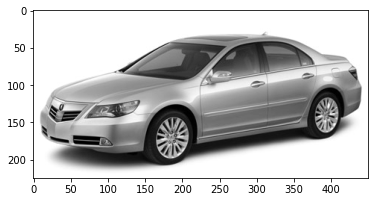

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm



for car_name in car_names:
    path = os.path.join(DATADIR,car_name)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #converting image to array
        plt.imshow(img_array , cmap='gray')
        plt.show()
        break
    break

In [8]:
print(img_array)
img_array.shape

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


(225, 450)

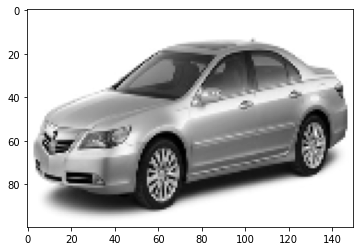

In [9]:
#checking image quality with resized values
img_len=150
img_wid=100
new_array = cv2.resize(img_array, (img_len,img_wid))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
new_array.shape

(100, 150)

In [11]:
#prepare_training_data()

training_data = []
def create_training_data():
    
    for car_name in car_names:
        path = os.path.join(DATADIR,car_name)
        class_num = car_names.index(car_name)#giving index number to each car names in list
        
        for img in tqdm(os.listdir(path)): #iterate over each image , folder names each car's names
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #converting to array
            new_array = cv2.resize(img_array,(img_len,img_wid))
            training_data.append([new_array,class_num])#creating training list which include car index and image array
        

In [12]:

create_training_data()
print("total number of image in training list",len(training_data))

100%|██████████| 40/40 [00:00<00:00, 92.92it/s]

total number of image in training list 8099


In [13]:
import random
random.shuffle(training_data)         #shuffling data to avoid overfitting
for sample in training_data[:10]:      #to check shuffled or not
    print(sample[1])
print(training_data[0])
    


138
52
2
7
51
29
32
170
1
80
[array([[ 5, 13, 10, ..., 25, 35, 38],
       [ 3, 45, 44, ..., 28, 37, 25],
       [ 2,  1,  5, ..., 11, 22, 12],
       ...,
       [16, 18, 15, ...,  1,  1,  3],
       [16, 16, 17, ...,  2,  1,  1],
       [15, 16, 16, ...,  1,  1,  1]], dtype=uint8), 138]


In [14]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)

#print(x[0].reshape(-1, img_len, img_wid, 1))

y = np.array(y)
x = np.array(x).reshape(-1, img_len, img_wid, 1) #reshaping the array as suitable to feed the cnvolutional network
print(x[0])
print("________________")
print(y[10])

[[[ 5]
  [13]
  [10]
  ...
  [86]
  [20]
  [35]]

 [[20]
  [24]
  [24]
  ...
  [ 3]
  [ 2]
  [ 2]]

 [[ 4]
  [31]
  [33]
  ...
  [28]
  [37]
  [25]]

 ...

 [[16]
  [16]
  [17]
  ...
  [ 1]
  [ 0]
  [ 2]]

 [[ 4]
  [ 4]
  [ 4]
  ...
  [ 6]
  [ 1]
  [ 2]]

 [[ 1]
  [ 1]
  [ 1]
  ...
  [ 1]
  [ 1]
  [ 1]]]
________________
6


In [15]:
print(x.shape,y.shape)

(8099, 150, 100, 1) (8099,)


In [16]:
#saving trainiable arrays to pickle file

import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

#pickle_in = open("x.pickle","rb")
#x = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in) 

In [17]:
#plt.imshow(x[0],cmap='gray')
#plt.show()



print(x.shape,y.shape)
y[:10]


(8099, 150, 100, 1) (8099,)


array([138,  52,   2,   7,  51,  29,  32, 170,   1,  80])

In [18]:
#preparing test data


TEST_DIR= '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/test'
testing_data = []
def create_testing_data():
    
    for car_name in car_names:
        path = os.path.join(TEST_DIR,car_name)
        class_num = car_names.index(car_name)#giving index number to each car names in list
        
        for img in tqdm(os.listdir(path)): #iterate over each image is folder names each car's names
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #converting to array
            new_array = cv2.resize(img_array,(img_len,img_wid))
            testing_data.append([new_array,class_num])#creating testing list which include car index and image array
    

create_testing_data()
print("total number of image in testing list",len(testing_data))

100%|██████████| 40/40 [00:00<00:00, 94.21it/s]

total number of image in testing list 7997


In [19]:
    random.shuffle(testing_data)  #shuffling testing data
    x_test = []
    y_test = []

    for features,label in testing_data:
        x_test.append(features)   #preparing x train and y train
        y_test.append(label)

    #print(x[0].reshape(-1, img_len, img_wid, 1))

    y_test = np.array(y)
    x_test = np.array(x).reshape(-1, img_len, img_wid, 1) #reshaping the array as suitable to feed the cnvolutional network


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models 
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from tensorflow.keras import layers

pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in) 

x = x/255.0

#preparing convolutional ntework layers

cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3, 3),activation='relu',input_shape=(x.shape[1:])),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),            #creating artificial neural network
    layers.Dense(64,activation='relu'),
    layers.Dense(195,activation='softmax')
])


In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 98, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 52992)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3391552   
_________________________________________________________________
dense_1 (Dense)              (None, 195)               1

In [22]:
#training the model

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn.fit(x, y, epochs=10)

Epoch 1/10
254/254 [==============================] - 12s 25ms/step - loss: 5.2936 - accuracy: 0.0046
Epoch 2/10
254/254 [==============================] - 6s 25ms/step - loss: 5.2720 - accuracy: 0.0086
Epoch 3/10
254/254 [==============================] - 6s 24ms/step - loss: 5.2427 - accuracy: 0.0128
Epoch 4/10
254/254 [==============================] - 6s 24ms/step - loss: 5.0117 - accuracy: 0.0371
Epoch 5/10
254/254 [==============================] - 6s 24ms/step - loss: 4.2007 - accuracy: 0.1547
Epoch 6/10
254/254 [==============================] - 6s 24ms/step - loss: 2.7806 - accuracy: 0.4159
Epoch 7/10
254/254 [==============================] - 6s 26ms/step - loss: 1.6191 - accuracy: 0.6539
Epoch 8/10
254/254 [==============================] - 6s 24ms/step - loss: 0.7938 - accuracy: 0.8403
Epoch 9/10
254/254 [==============================] - 6s 25ms/step - loss: 0.4517 - accuracy: 0.9112
Epoch 10/10
254/254 [==============================] - 6s 24ms/step - loss: 0.2771 - accur

In [23]:
cnn.evaluate(x_test,y_test)

254/254 [==============================] - 5s 20ms/step - loss: 31.9220 - accuracy: 0.9276


[31.921998977661133, 0.9276453852653503]

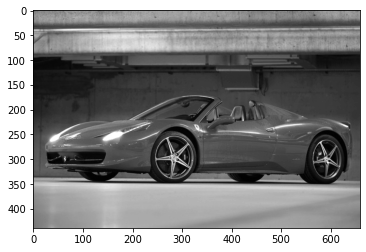

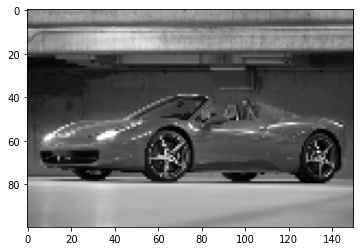

In [38]:
#Now giving a car image to the model to know it will predict or not

test_image_path = '../input/ewffwrwfw/OB-QP946_rumble_H_20111117150837.jpg'
img_test_array = cv2.imread(test_image_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_test_array,cmap = 'gray')
plt.show()
n_img_test_array=cv2.resize(img_test_array,(img_len,img_wid))
plt.imshow(n_img_test_array, cmap='gray')
plt.show()
test_pctr = np.array(n_img_test_array).reshape(-1,img_len,img_wid,1)

'Ferrari 458 Italia Convertible 2012'

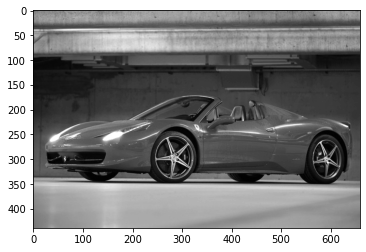

In [39]:
plt.imshow(img_test_array,'gray')
y_p=cnn.predict(test_pctr)
prediction_index=np.argmax(y_p)
car_names[prediction_index]